# Keras Basics

Welcome to the section on deep learning! We'll be using Keras with a TensorFlow backend to perform our deep learning operations.

This means we should get familiar with some Keras fundamentals and basics!

## Imports



In [1]:
import numpy as np

## Dataset

We will use the Bank Authentication Data Set to start off with. This data set consists of various image features derived from images that had 400 x 400 pixels. You should note **the data itself that we will be using ARE NOT ACTUAL IMAGES**, they are **features** of images. In the next lecture we will cover grabbing and working with image data with Keras. This notebook focuses on learning the basics of building a neural network with Keras.

_____
More info on the data set:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

## Reading in the Data Set

We've already downloaded the dataset, its in the DATA folder. So let's open it up. 

In [1]:
from numpy import genfromtxt
data = genfromtxt('../DATA/bank_note_data.txt', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: '../DATA/bank_note_data.txt'

In [ ]:
data

In [ ]:
labels = data[:,4]
labels

In [ ]:
features = data[:,0:4]
features

In [ ]:
X = features
y = labels

## Split the Data into Training and Test

Its time to split the data into a train/test set. Keep in mind, sometimes people like to split 3 ways, train/test/validation. We'll keep things simple for now. **Remember to check out the video explanation as to why we split and what all the parameters mean!**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

## Standardizing the Data

Usually when using Neural Networks, you will get better performance when you standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

The scikit learn library also provides a nice function for this.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_object = MinMaxScaler()

In [ ]:
scaler_object.fit(X_train)

In [ ]:
scaled_X_train = scaler_object.transform(X_train)

In [ ]:
scaled_X_test = scaler_object.transform(X_test)

In [ ]:
X_train.max()

In [ ]:
scaled_X_train.max()

In [ ]:
X_train

In [ ]:
scaled_X_train

## Building the Network with Keras

Let's build a simple neural network!

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Creates model
model = Sequential()
# 8 Neurons, expects input of 4 features. 
# Play around with the number of neurons!!
model.add(Dense(4, input_dim=4, activation='relu'))
# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(8, activation='relu'))
# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(1, activation='sigmoid'))

### Compile Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit (Train) the Model

In [ ]:
# Play around with number of epochs as well!
model.fit(scaled_X_train,y_train,epochs=50, verbose=2)

## Predicting New Unseen Data

Let's see how we did by predicting on **new data**. Remember, our model has **never** seen the test data that we scaled previously! This process is the exact same process you would use on totally brand new data. For example , a brand new bank note that you just analyzed .

In [ ]:
scaled_X_test
# Spits out probabilities by default.
# model.predict(scaled_X_test)

In [ ]:
model.predict_classes(scaled_X_test)

# Evaluating Model Performance

So how well did we do? How do we actually measure "well". Is 95% accuracy good enough? It all depends on the situation. Also we need to take into account things like recall and precision. Make sure to watch the video discussion on classification evaluation before running this code!

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x=scaled_X_test,y=y_test)

In [5]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions = model.predict_classes(scaled_X_test)

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
print(classification_report(y_test,predictions))

## Saving and Loading Models

Now that we have a model trained, let's see how we can save and load it.

In [ ]:
model.save('myfirstmodel.h5')

In [6]:
from keras.models import load_model

In [ ]:
newmodel = load_model('myfirstmodel.h5')

In [ ]:
newmodel.predict_classes(X_test)

# Convolutional Neural Networks for Image Classification

In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_train.shape

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

In [ ]:
single_image.shape

In [ ]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels


In [ ]:
y_train

In [ ]:
y_test

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [9]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train.shape

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example

In [ ]:
y_example.shape

In [ ]:
y_example[0]

In [ ]:
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
### Processing X Data

#We should normalize the X data

In [ ]:
single_image.max()

In [ ]:
single_image.min()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
scaled_single = x_train[0]

In [ ]:
scaled_single.max()

In [ ]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [ ]:
x_train.shape

In [ ]:
x_test.shape

Reshape to include channel dimension (in this case, 1 channel)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
x_train.shape

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_test.shape

# Training the Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

## Train the Model

In [13]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(x_train,y_cat_train,epochs=2)

NameError: name 'y_cat_train' is not defined

## Evaluate the Model

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
predictions = model.predict_classes(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
predictions[0]

In [ ]:
y_test

In [ ]:
print(classification_report(y_test,predictions))

# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

In [ ]:
x_train[0].shape

import matplotlib.pyplot as plt

In [ ]:
# FROG
plt.imshow(x_train[0])

In [ ]:
# HORSE
plt.imshow(x_train[12])

# HORSE
plt.imshow(x_train[12])

In [ ]:
x_train[0]

In [ ]:
x_train[0].shape

In [ ]:
x_train.max()

In [ ]:
x_train = x_train/225

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

In [ ]:
x_test.shape

## Labels

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train.shape

In [ ]:
y_train[0]

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_train.shape

In [ ]:
y_cat_train[0]

In [ ]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

In [ ]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

## Optional: Large Model

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
model.save('larger_CIFAR10_model.h5')

## Deep learning on custom images

# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

-----------

The Kaggle Competition: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!

--------
----------
------------


**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [2]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [8]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [9]:
type(cat4)

numpy.ndarray

In [10]:
cat4.shape

(375, 500, 3)

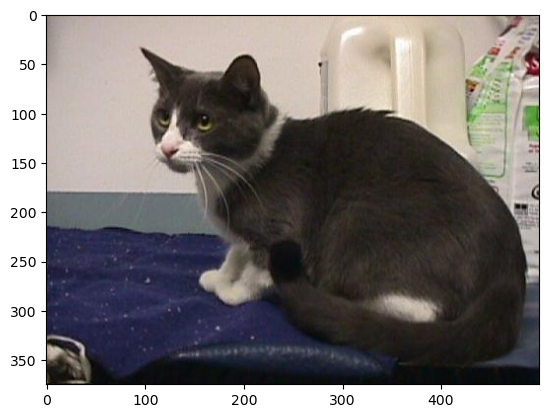

In [11]:
plt.imshow(cat4)

In [13]:
dog2 = cv2.imread('CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [14]:
dog2.shape

(199, 188, 3)

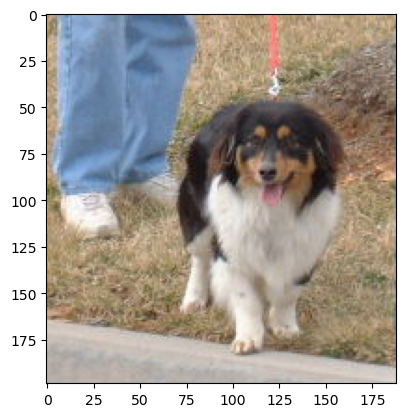

In [15]:
plt.imshow(dog2)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

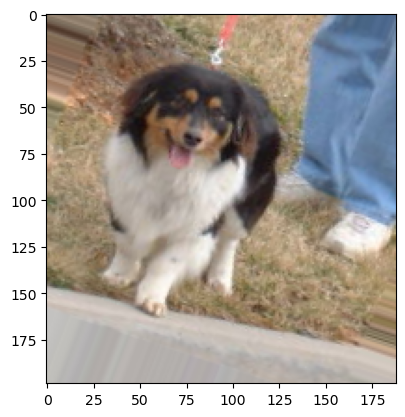

In [18]:
plt.imshow(image_gen.random_transform(dog2))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [20]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [21]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [22]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [23]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### Training the Model

In [27]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [28]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

In [ ]:
# model.save('cat_dog2.h5')

# Evaluating the Model

In [ ]:
results.history['acc']

In [ ]:
plt.plot(results.history['acc'])

In [ ]:
# model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [ ]:
train_image_gen.class_indices

In [ ]:
import numpy as np
from keras.preprocessing import image

dog_file = '../DATA/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [ ]:
prediction_prob = model.predict(dog_img)

In [ ]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

In [ ]:
# Additional code - after keras update!
# pred = (model.predict(scale_X_test) > 0.5).astype("int32")
# predictions = np.argmax(model.predict(x_test), axis=-1)

